In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dist = pd.DataFrame([[0,1,2,3,1,2,3,4],[1,0,1,2,2,1,2,3],[2,1,0,1,3,2,1,2],
                      [3,2,1,0,4,3,2,1],[1,2,3,4,0,1,2,3],[2,1,2,3,1,0,1,2],
                      [3,2,1,2,2,1,0,1],[4,3,2,1,3,2,1,0]],
                    columns=["A","B","C","D","E","F","G","H"],
                    index=["A","B","C","D","E","F","G","H"])

Flow = pd.DataFrame([[0,5,2,4,1,0,0,6],[5,0,3,0,2,2,2,0],[2,3,0,0,0,0,0,5],
                      [4,0,0,0,5,2,2,10],[1,2,0,5,0,10,0,0],[0,2,0,2,10,0,5,1],
                      [0,2,0,2,0,5,0,10],[6,0,5,10,0,1,10,0]],
                    columns=["A","B","C","D","E","F","G","H"],
                    index=["A","B","C","D","E","F","G","H"])

In [2]:
# Hyperparameters

T0 = 1500
alpha = 0.9
M = 250
N = 20

In [3]:
# Initial Solution

X0 = ["B","D","A","E","C","F","G","H"]

New_Dist_DF = Dist.reindex(index=X0, columns=X0)
New_Dist_Arr = np.array(New_Dist_DF)

Objfun1_start = pd.DataFrame(New_Dist_Arr*Flow)
Objfun1_start_Arr = np.array(Objfun1_start)

sum_start = np.sum(Objfun1_start_Arr)

print(sum_start)

336


In [4]:
# Solution space search
temp = []
obj_values_store = []

for i in range(M):
    for j in range(N):
        rand_numb_1 = np.random.randint(0,len(X0))
        rand_numb_2 = np.random.randint(0,len(X0))
        
        while rand_numb_1 == rand_numb_2:
            rand_numb_2 = np.random.randint(0,len(X0))
        
        x_temp = []
        x_final = []

        A1 = X0[rand_numb_1]
        A2 = X0[rand_numb_2]

        for k in range(len(X0)):
            if X0[k] == A1:
                x_temp.append(A2)
            elif X0[k] == A2:
                x_temp.append(A1)
            else:
                x_temp.append(X0[k])
        
        New_Dist_DF_init = Dist.reindex(columns=X0, index=X0)
        New_Dist_Arr_init = np.array(New_Dist_DF_init)

        New_Dist_DF_temp = Dist.reindex(columns=x_temp, index=x_temp)
        New_Dist_Arr_temp = np.array(New_Dist_DF_temp)

        Obj_value_DF_init = pd.DataFrame(New_Dist_Arr_init*Flow)
        Obj_value_init_Arr = np.array(Obj_value_DF_init)

        Obj_value_temp_DF = pd.DataFrame(New_Dist_Arr_temp*Flow)
        Obj_value_temp_Arr = np.array(Obj_value_temp_DF)

        sum_init = np.sum(Obj_value_init_Arr)
        sum_temp = np.sum(Obj_value_temp_Arr)

        rand1 = np.random.rand()
        form = 1/(np.exp(sum_temp-sum_init)/T0)

        if sum_temp <= sum_init:
            X0 = x_temp
        elif rand1<form:
            X0 = x_temp
        else:
            continue
    obj_values_store.append(sum_init)
    temp.append(T0)
    T0 = alpha*T0
print()
print("Final Solution:",X0)
print("Minimized Cost:",sum_init)


Final Solution: ['C', 'D', 'H', 'B', 'A', 'E', 'F', 'G']
Minimized Cost: 214


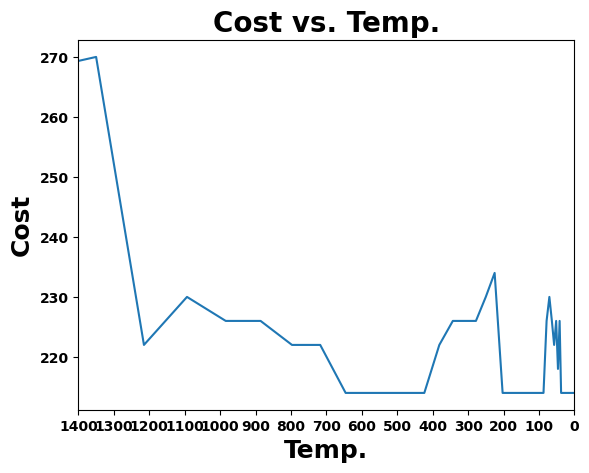

In [5]:
plt.plot(temp,obj_values_store)
plt.title("Cost vs. Temp.", fontsize=20,fontweight='bold')
plt.xlabel("Temp.", fontsize=18,fontweight='bold')
plt.ylabel("Cost", fontsize=18,fontweight='bold')
plt.xlim(1000,0)

plt.xticks(np.arange(min(temp),max(temp),100),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()
